# Project 2 - Arctic ice maps

**Project deadline:** This project is due for submission on Wednesday, 25.05.2022, 23:59. Please check carefully the *About the Projects* section below for further details.

**Important:** You have the choice between two projects. This one has a scientific focus. In the other one, you can program a game and its focus is on elements of the `Python`-language and on programming techniques. We strongly advise you to read through both project notebooks completely before you take a decision.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignmentts, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted by uploading this notebook to [Projects/Project 2](https://ecampus.uni-bonn.de/goto_ecampus_exc_2645968.html) on eCampus. You do not need to modify the notebooks name before your upload. Your project must be on eCampus by Wednesday, 25.05.2022, 23:59. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Nina and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

## Introduction

The purpose of this project is to become familiar with working on image data, plotting it, and combining it in various ways for analysis. 

The data used in this problem set was/is collected by two different satellite missions. Involved are the AMSR-E instrument on the [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite (data from 2002 to 2011) and the AMSR2 instrument on the [GCOM-W](https://suzaku.eorc.jaxa.jp/GCOM_W/) satellite (data from 2013 to-date). The data consist of maps of the concentration of ice in the Arctic collected between 2002 and 2019 with the exception of 2012. All the data were already downloaded and transformed for you to an easy-to-use format from [here](https://seaice.uni-bremen.de/start/data-archive/). As already stated in the frist project, one of the main issues to work on scientific data with Python is to first read them from various formats into `numpy`-arrays. We will come back to this issue in class but you do not need to worry about it here.

The data you should use are in the directory `/home/shared/Project_2/ice_data` within our online-system. This is actually a (small) subset of the complete satellite data set, with only two ice maps every month (some are missing though). You should explore yourself the original data if you are interested to work with the full data set. I am very happy to help you with that! Although we only work with a small subset of available ice-maps, we would like to ask you *not* to copy them to your private space within our system but to work with them at their current location. We would like to avoid multiplying 400MB more than 100 times! If you would like to use the data on your own computer, there is a `tar`-archive at `/home/shared/Project_2/ice_data_2022.tgz`.

The data is in `numpy` format, which means that you can read it as a `numpy`-array using:

    >>> import numpy as np
    >>> data = np.load('/home/shared/Project_2/ice_data/20080415.npy')

which will give you a 2-d array. Just for information, this was created with:

    >>> np.save('ice_data/20080415.npy', data)
    
where `data` was a 2-d `numpy`-array that was extracted from the original data set.

**Note:** There is an ice-map for each first and each 15th of a month from the years 2003-2011 and 2013-2021 (a small amount of data is missing). For instance, the file `20080415.npy` represents data for the 15th of April 2008.

## Task 1 - getting familiar with the data and examining a single map 

**Please put the solution of this and the other tasks at the end of this notebook! You will submit the modified notebook to eCampus.**

Start off by reading in some  map as shown above, and plot it with Matplotlib (look up the `plt.imshow`-function). Note that to get the correct orientation, you will need to call the ``imshow`` command with the ``origin='lower'`` option, which ensures that the (0,0) pixels is on the bottom left, not the top left. You can try and use different colormaps if you like (set by the ``cmap`` option) - see [here](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html) (scroll down on the page) for information on the available colormaps. You can specify a colormap to use with e.g. ``cmap=plt.cm.jet`` (i.e. ``cmap=plt.cm.`` followed by the name of the colormap). Note that you can make figures larger by specifying e.g.

    >>> plt.figure(figsize=(8,8))

where the size is given in inches. Try and find a way to plot a colorbar on the side, to show what color corresponds to what value. Remember that you can always look at the [Matplotlib Gallery](http://matplotlib.org/gallery.html) to find example plots for each `matplotlib`-feature. You can also try and remove the tick labels (``100``, ``200``, etc.) since they are not useful - but don't worry if you can't figure out how.

**Remarks:** (1) When you explore the data-values, you will notice that they contain numbers from 0 to 100. A value of 50 means that 50% of the area occupied by the corresponding pixel are covered with ice. A value of zero means that the complete pixel is covered with water; (2) Besides the numbers, a good deal of the pixels contains the special value `nan` (not a number). These are areas covered by land. Functions like `imshow` automatically ignore these values and do not produce an error. If you intend to do numerical calculations (`numpy`) with pixels that have a `nan`-value, the result is `nan` again by default. To ignore `nan`-values for building sums etc., you would need to use functions as `np.nansum` instead of `np.sum` etc.

I show below the result I obtain for this step (one winter and one summer map).
<img src="figs/ice_winter_summer.png" style="height: 300px;">

## Task 2 - reading in and examining multiple maps 

We now want to make a plot of the ice concentration over time. Reading in a single map is easy, but since we have more than 350 maps, we do not want to read them all in individually by hand. Write a loop over all the available files, and inside the loop, read in the data to a variable (e.g. ``data``), and also extract the year, month, and day as integer values (e.g. ``year``, ``month``, and ``day``) from the filename. Then, also inside the loop, construct an array ``times`` which is essentially the fractional time in years. You can assume for simplicity that each month has 30 days and each year has 360 days - this will not affect the results later. As an example, in the year 2003, you would put the 1st of January as $2003.00$, the 2nd of January as $2003 + \frac{1}{360}\approx 2003.033$ and the 1st of February as $2003 + \frac{1}{12}\approx 2003.083$ into the `times`-array. Finally, also compute for each file the total number of pixels that have a value above 50% ice. Put also those values into an array. After the loop, make a plot of the number of pixels with a concentration above 50% against time.

**Hint:** To loop over files, I showed you the `glob`-module in lecture. Make sure that the filenames are *sorted* by name and hence also sorted in time. 

We now want something a little more quantitative than just the number of pixels, so we will try and compute the area where the ice concentration is above a given threshold. However, we first need to know the area of the pixels in the image, and since we are looking at a projection of a spherical surface, each pixel will be a different area. The areas (in km$^{2}$) are contained inside the file named ``ice_data_area.npy`` (within the `/home/shared/Project_2` directory). Read in the areas and make a plot (with colorbar) to see how the pixel area is changing over the image.

Now, loop over the files again as before, but this time, for each file, compute the total area where the concentration of ice is 99% or above. Make a new plot showing the area of >99% ice concentration against time. Also plot the *total area* covered by ice as a function of time.

Describe what you see - how does the minimum value within each year change over time?

## Task 3 - visualizing changes over time; does the amount of ice decrease?

In the following we always work with the *total area* covered by ice from the previous task. 

Find the date at which the area of the region covered with ice is the smallest. What is the value of the minimum area?

**Hint:** Have a look at the `np.argmin` function.

Next, read in the map for this minimum, and the map for the same day and month but from 2003. Make a side-by-side plot showing the two ice-concentrations.

Compute the difference between the two maps so that a loss in ice over time will correspond to a negative value, and a gain in ice will correspond to a positive value. Make a plot of the difference, and use the ``RdBu`` colormap to highlight the changes (include a colorbar).

**Hint:** To make a plot with different sub-figures, check out the `plt.subplot` function.

Finally, plot the `mean` ice concentrations of the years 2004-2006 over the months January to December and compare it to the mean over the years 2019-2021. What was the loss of the ice over the past 15 years at the minimum values?

**Hint:** I showed you in the lecture how to easily do this when converting corresponding data to 2d `numpy`-arrays.

## Epilogue

The data that we have here cover the past twenty years and it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. Many scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer.

In [1]:
#modules required for the notebook
import glob #pathname pattern matching
import os #path manipulation
import numpy as np
import matplotlib.pyplot as plt

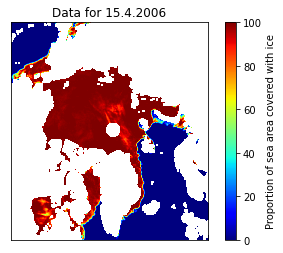

<Figure size 720x720 with 0 Axes>

In [19]:
#task 1
string = "/home/shared/Project_2/ice_data/20060415.npy" #change file path here for a different plot
#data for April 15, 2006 is taken as an example

data = np.load(string) #load the data onto an array
filename = os.path.basename(string) #get the filename from the path
year = int(filename[0:4]) #extract year from file name
month = int(filename[4:6]) #extract month from file name
date = int(filename[6:8]) #extract date from file name
#extracting year, month and date from the path can also be done with the help of regex.
#a typical approach would be to split the path at '/' and further split the
#string corresponding to year, month and date and such a method would be unnecessarily long.
#I believe os.path offers a more elegant solution in this case.


plt.imshow(data, origin = 'lower', cmap = plt.cm.jet) #imshow with jet cmap
plt.colorbar(label = 'Proportion of sea area covered with ice', orientation = 'vertical') #add colourbar
plt.xticks([]) #remove xticks
plt.yticks([]) #remove yticks
plt.title(f'Data for {day}.{month}.{year}') #add plot title
plt.figure(figsize = (10,10)) #set fig size
    
plt.show()

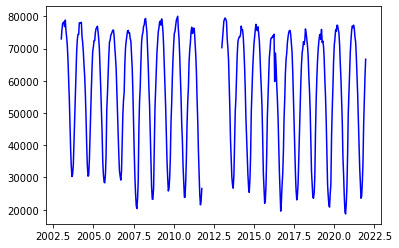

In [3]:
#task 2
string = "/home/shared/Project_2/ice_data/*.npy"

fiftyormore = np.zeros(len(glob.glob(string)))
timesfifty = np.zeros(len(glob.glob(string)))
flag = 0
for file in sorted(glob.glob(string)):
    data = np.load(file)
    filename = os.path.basename(file)
    year = int(filename[0:4])
    month = int(filename[4:6])
    day = int(filename[6:8])
    
    
    timesfifty[flag] = year + (month - 1)/12 + (day - 1)/360
    fiftyormore[flag] = len(data[(data>50)])
    flag += 1

plt.plot(timesfifty[timesfifty<2012], fiftyormore[timesfifty<2012],color='blue')
plt.plot(timesfifty[timesfifty>2012], fiftyormore[timesfifty>2012],color='blue')
plt.show()

<Figure size 720x720 with 0 Axes>

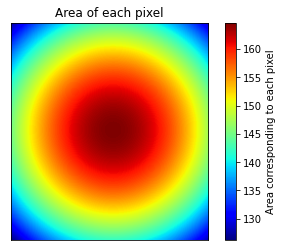

<Figure size 720x720 with 0 Axes>

In [4]:
area=np.load("/home/shared/Project_2/ice_data_area.npy")
plt.imshow(area, origin="lower", cmap=plt.cm.jet)
plt.colorbar(label="Area corresponding to each pixel", orientation="vertical")
plt.xticks([])
plt.yticks([])
plt.title("Area of each pixel")
plt.figure(figsize=(10,10))

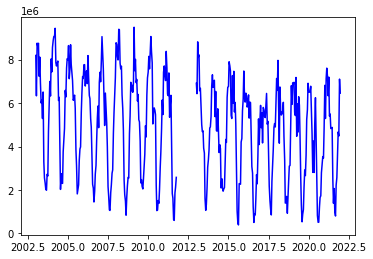

In [5]:
string = "/home/shared/Project_2/ice_data/*.npy"

ninenineormore = np.zeros(len(glob.glob(string)))
timesninenine = np.zeros(len(glob.glob(string)))
flag = 0
for file in sorted(glob.glob(string)):
    data = np.load(file)
    filename = os.path.basename(file)
    year = int(filename[0:4])
    month = int(filename[4:6])
    day = int(filename[6:8])
    
    timesninenine[flag] = year + (month - 1)/12 + (day - 1)/360
    ninenineormore[flag] = np.sum(data[(data>=99)] * area[(data>=99)]/100)
    flag += 1

plt.plot(timesninenine[timesninenine<2012], ninenineormore[timesninenine<2012],color='blue')
plt.plot(timesninenine[timesninenine>2012], ninenineormore[timesninenine>2012],color='blue')
plt.show()

[11385118.88270409 11709346.92206164 12073295.55431394 12097934.79796577
 12121601.80541428 11887178.38103212 12212378.64499469 11695616.64934723
 11323104.88164343 10995451.66397657 10224259.2413253   9533713.82142468
  8255716.81377715  7208629.47373779  5932825.92930197  5228101.78194565
  4712138.05309679  4934479.95487547  5374161.24567496  6510700.65560456
  8920811.18303225  9724896.54612951 10807090.58719408]


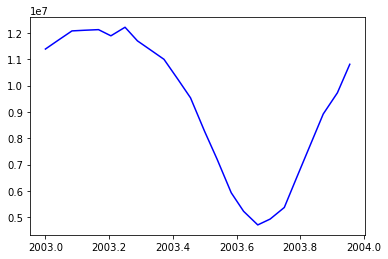

In [6]:
string = "/home/shared/Project_2/ice_data/2003*.npy"

zeromore = np.zeros(len(glob.glob(string)))
timeszero = np.zeros(len(glob.glob(string)))
flag = 0
for file in sorted(glob.glob(string)):
    data = np.load(file)
    filename = os.path.basename(file)
    year = int(filename[0:4])
    month = int(filename[4:6])
    day = int(filename[6:8])
    
    timeszero[flag] = year + (month - 1)/12 + (day - 1)/360
    zeromore[flag] = np.sum(data[(data> 0)] * area[(data> 0)]/100)
    flag += 1

print(zeromore)
plt.plot(timeszero[timeszero<2012], zeromore[timeszero<2012],color='blue')
plt.plot(timeszero[timeszero>2012], zeromore[timeszero>2012],color='blue')
plt.show()

In [7]:
minima = np.zeros((2021-2003))
years = np.zeros((2021-2003))

for i in range (2003, 2022):
    if i != 2012:
        minima[i] = min(zeromore[timeszero < i+1 and timeszero >= i])
        years[i] = i

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [8]:
mindateindex=np.argmin(zeromore)
mindate=timeszero[mindateindex]

factor = (((mindate-np.floor(mindate))*360))/30
print(np.floor(mindate))
print(np.floor(factor) + 1)
print(np.ceil((factor-np.floor(factor))*30) + 1)
minarea=zeromore[mindateindex]
print(minarea)

2003.0
9.0
2.0
4712138.053096792


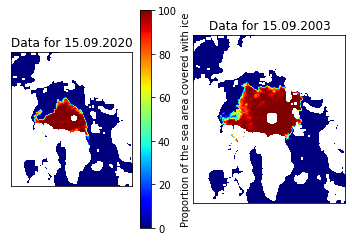

In [9]:
data1 = np.load('/home/shared/Project_2/ice_data/20200915.npy')
data2 = np.load('/home/shared/Project_2/ice_data/20030915.npy')


#plt.figure(figsize=(5,5))

plt.subplot(1, 2, 1)
plt.imshow(data1, origin="lower", cmap=plt.cm.jet)
plt.colorbar(label="Proportion of the sea area covered with ice", orientation="vertical")
plt.xticks([])
plt.yticks([])
plt.title('Data for 15.09.2020')

    
plt.subplot(1, 2, 2)
plt.imshow(data2, origin="lower", cmap=plt.cm.jet)
#plt.colorbar(label="Proportion of the sea area covered with ice", orientation="vertical")
plt.xticks([])
plt.yticks([])
plt.title('Data for 15.09.2003')


plt.show()

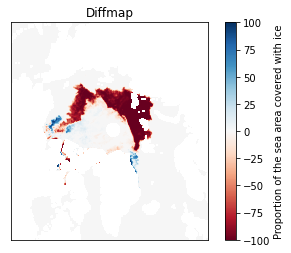

In [10]:
datadiff = data1 - data2

plt.imshow(datadiff, origin="lower", cmap=plt.cm.RdBu)
plt.colorbar(label="Proportion of the sea area covered with ice", orientation="vertical")
plt.xticks([])
plt.yticks([])
plt.title('Diffmap')
plt.show()

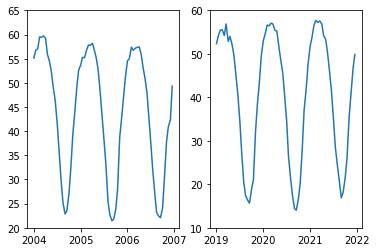

21.458662033081055 59.69178009033203


In [11]:
iceconc1 = np.zeros(len(glob.glob("/home/shared/Project_2/ice_data/200[4-6]*.npy")))
timesconc1 = np.copy(iceconc1)
iceconc2 = np.zeros(len(glob.glob("/home/shared/Project_2/ice_data/2019*.npy") + glob.glob("/home/shared/Project_2/ice_data/202[0-1]*.npy")))
timesconc2 = np.copy(iceconc2)
                    
flag = 0
for file in sorted(glob.glob("/home/shared/Project_2/ice_data/200[4-6]*.npy")):
    dataavg1 = np.load(file)
    filename = os.path.basename(file)
    year = int(filename[0:4])
    month = int(filename[4:6])
    day = int(filename[6:8])
     
    timesconc1[flag] = year + (month - 1)/12 + (day - 1)/360
    iceconc1[flag] = (np.nanmean(dataavg1))
    flag += 1

flag = 0
for file in sorted(glob.glob("/home/shared/Project_2/ice_data/2019*.npy") + glob.glob("/home/shared/Project_2/ice_data/202[0-1]*.npy")):
    dataavg2 = np.load(file)
    filename = os.path.basename(file)
    year = int(filename[0:4])
    month = int(filename[4:6])
    day = int(filename[6:8])
     
    timesconc2[flag] = year + (month - 1)/12 + (day - 1)/360
    iceconc2[flag] = (np.nanmean(dataavg2))
    flag += 1


plt.subplot(1,2,1)
plt.ylim(20,65)
plt.plot(timesconc1, iceconc1)
plt.subplot(1,2,2)
plt.plot(timesconc2, iceconc2)
plt.ylim(10,60)
plt.show()

print(min(iceconc1), max(iceconc1))

[21352309.55442455 21435202.24258335 21427611.34743513 21417758.64124335
 21201263.89052908 20263770.69265809 17499214.01401734 13496385.23026462
 11703929.22793594 13467631.34376236  9266482.69774415 20973301.19271384]


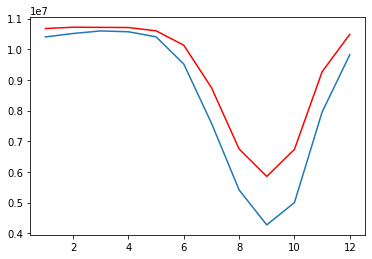

In [12]:
iceconc1 = np.zeros(12)
timesconc1 = np.copy(iceconc1)
iceconc2 = np.zeros(12)
timesconc2 = np.copy(iceconc2)

for file in sorted(glob.glob("/home/shared/Project_2/ice_data/2003*.npy")):
    dataavg1 = np.load(file)
    filename = os.path.basename(file)
    year = int(filename[0:4])
    month = int(filename[4:6])
    day = int(filename[6:8])
    
    iceconc1[month - 1] += np.nansum(data[(dataavg1> 0)] * area[(dataavg1> 0)]/100)
    timesconc1[month - 1] += 1

for file in sorted(glob.glob("/home/shared/Project_2/ice_data/2019*.npy") + glob.glob("/home/shared/Project_2/ice_data/202[0-1]*.npy")):
    dataavg2 = np.load(file)
    filename = os.path.basename(file)
    year = int(filename[0:4])
    month = int(filename[4:6])
    day = int(filename[6:8])
    
    iceconc2[month - 1] += np.nansum(data[(dataavg2> 0)] * area[(dataavg2> 0)]/100)
    timesconc2[month - 1] += 1
    
meanconc1 = iceconc1/timesconc1
meanconc2 = iceconc2/timesconc2
print(iceconc1)

plt.plot(np.arange(1, 13, 1), meanconc1, color='r')
plt.plot(np.arange(1, 13, 1), meanconc2)
plt.show()



In [13]:
rate = (min(meanconc2)-min(meanconc1))/15
print(-1*min(meanconc2)/rate)
print(min(meanconc2))

40.53943740781551
4271475.626206507
